In [1]:
import pyreadstat
import pandas as pd

In [2]:
"""df = pd.read_parquet("PISA_2022_cleaned.parquet")

df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values if any conversion failed
df.dropna(inplace=True)"""

'df = pd.read_parquet("PISA_2022_cleaned.parquet")\n\ndf = df.apply(pd.to_numeric, errors=\'coerce\')\n\n# Drop rows with NaN values if any conversion failed\ndf.dropna(inplace=True)'

In [3]:
"""columns_for_clustering = ["one-on-one", "IKT", "video", "small_group", "large_group", "none"]
X = df[columns_for_clustering]"""

'columns_for_clustering = ["one-on-one", "IKT", "video", "small_group", "large_group", "none"]\nX = df[columns_for_clustering]'

In [4]:
"""sas_file_path = 'cy08msp_stu_qqq.sas7bdat'
df, meta = pyreadstat.read_sas7bdat(sas_file_path)

# Export to Parquet
parquet_file_path = 'PISA_2022.parquet'
df.to_parquet(parquet_file_path, engine='pyarrow')"""

"sas_file_path = 'cy08msp_stu_qqq.sas7bdat'\ndf, meta = pyreadstat.read_sas7bdat(sas_file_path)\n\n# Export to Parquet\nparquet_file_path = 'PISA_2022.parquet'\ndf.to_parquet(parquet_file_path, engine='pyarrow')"

In [5]:
df = pd.read_parquet("PISA_2022.parquet")
column_rename_map = {
    'ST297Q01JA': 'one-on-one',
    'ST297Q03JA': 'IKT',
    'ST297Q05JA': 'video',
    'ST297Q06JA': 'small_group',
    'ST297Q07JA': 'large_group',
    'ST297Q09JA': 'none',
    "ST331Q01JA": "effort"
}

# Renaming the columns
df.rename(columns=column_rename_map, inplace=True)

In [6]:
filtered_df = df[df['CNT'] == 'SLV']

df_international = df

In [7]:
columns_for_clustering = ["one-on-one", "IKT", "video", "small_group", "large_group", "none","effort"]
X = filtered_df[columns_for_clustering]

X_international =df_international[columns_for_clustering]

In [8]:
X = X.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values if any conversion failed
X.dropna(inplace=True)

X_international = X_international.apply(pd.to_numeric, errors='coerce')
X_international.dropna(inplace=True)

In [9]:
df = X

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10,algorithm="lloyd")  # Adjust the number of clusters as needed
kmeans.fit(X)
clusters = kmeans.labels_

df['Cluster'] = clusters

In [11]:
df.head()

,one-on-one,IKT,video,small_group,large_group,none,effort,Cluster
158592,0.0,0.0,0.0,0.0,0.0,1.0,8.0,2
158594,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1
158595,1.0,0.0,1.0,0.0,0.0,0.0,5.0,1
158596,1.0,1.0,0.0,1.0,1.0,0.0,7.0,2
158597,0.0,0.0,1.0,0.0,0.0,0.0,7.0,2


In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import kruskal

In [13]:
cluster1_effort = df[df['Cluster'] == 1]['effort']
cluster2_effort = df[df['Cluster'] == 2]['effort']
cluster3_effort = df[df['Cluster'] == 0]['effort']

# Perform Kruskal-Wallis H Test
stat, p_value = kruskal(cluster1_effort, cluster2_effort, cluster3_effort)

print(f"Kruskal-Wallis H Test statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in effort between clusters.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in effort between clusters.")

Kruskal-Wallis H Test statistic: 3957.7056617290255
P-value: 0.0
Reject the null hypothesis: There is a significant difference in effort between clusters.


In [14]:
import scikit_posthocs as sp
# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in effort between clusters.")
    # Perform Dunn's test
    posthoc = sp.posthoc_dunn(df, val_col='effort', group_col='Cluster', p_adjust='bonferroni')
    print("Dunn's Test results:\n", posthoc)
else:
    print("Fail to reject the null hypothesis: There is no significant difference in effort between clusters.")

Reject the null hypothesis: There is a significant difference in effort between clusters.
Dunn's Test results:
      0             1             2
0  1.0  0.000000e+00  0.000000e+00
1  0.0  1.000000e+00  1.861958e-62
2  0.0  1.861958e-62  1.000000e+00


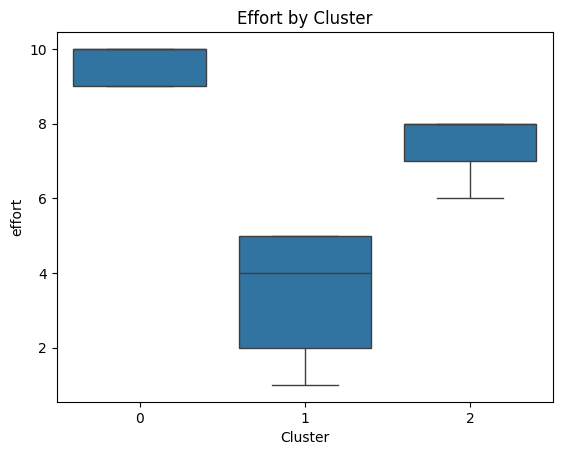

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Cluster', y='effort', data=df)
plt.title('Effort by Cluster')
plt.show()

In [16]:
cluster_counts = df['Cluster'].value_counts()

print("Number of values in each cluster:")
print(cluster_counts)

Number of values in each cluster:
Cluster
0    2429
2    1733
1     498
Name: count, dtype: int64


In [17]:
average_effort_per_cluster = df.groupby('Cluster')['effort'].mean()

print("Average effort for each cluster:")
print(average_effort_per_cluster)

Average effort for each cluster:
Cluster
0    9.613009
1    3.248996
2    7.428159
Name: effort, dtype: float64


International

In [18]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10,algorithm="lloyd")  # Adjust the number of clusters as needed
kmeans.fit(X_international)
clusters = kmeans.labels_

X_international['Cluster'] = clusters

Kruskal-Wallis H Test statistic: 373832.53497781814
P-value: 0.0
Reject the null hypothesis: There is a significant difference in effort between clusters.


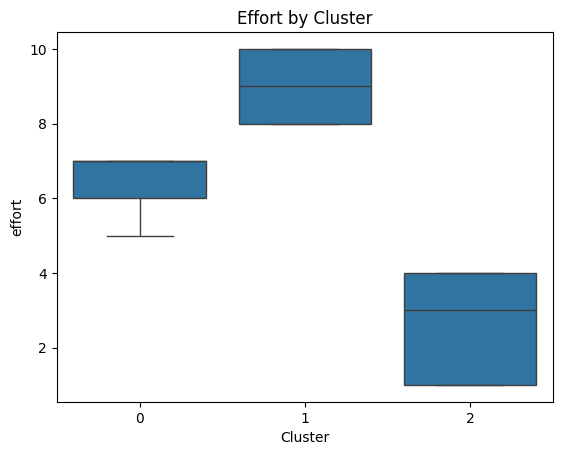

In [19]:
cluster1_effort = X_international[X_international['Cluster'] == 1]['effort']
cluster2_effort = X_international[X_international['Cluster'] == 2]['effort']
cluster3_effort = X_international[X_international['Cluster'] == 0]['effort']

# Perform Kruskal-Wallis H Test
stat, p_value = kruskal(cluster1_effort, cluster2_effort, cluster3_effort)

print(f"Kruskal-Wallis H Test statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in effort between clusters.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in effort between clusters.")


sns.boxplot(x='Cluster', y='effort', data=X_international)
plt.title('Effort by Cluster')
plt.show()

In [20]:
average_effort_per_cluster = X_international.groupby('Cluster')['effort'].mean()

print("Average effort for each cluster:")
print(average_effort_per_cluster)

Average effort for each cluster:
Cluster
0    6.279507
1    8.952983
2    2.494133
Name: effort, dtype: float64


In [21]:
cluster_counts = X_international.groupby('Cluster').size()
print(cluster_counts)

Cluster
0    153549
1    259015
2     49942
dtype: int64
